cluster
0    43637
3    39292
1    37745
4    32176
2    16054
Name: count, dtype: int64
Explained Variance Ratio by PCA: [0.13880381 0.10087273]


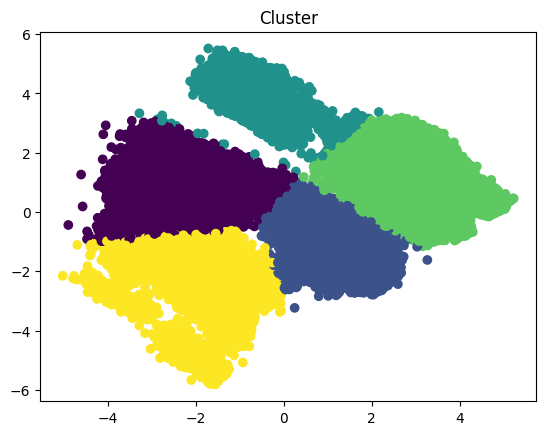

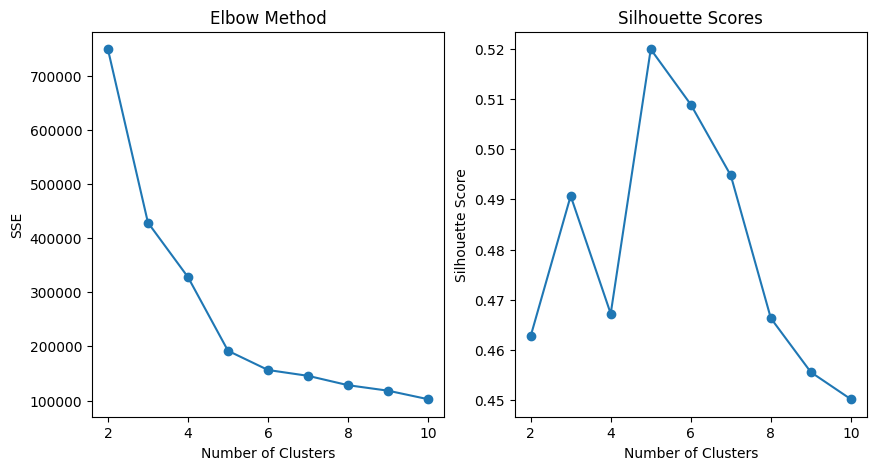

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Æ¯¼º-¶óº§ µ¥ÀÌÅÍ ºÐ¸®
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']

# µ¥ÀÌÅÍ¸¦ Á¤±ÔÈ­
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA¸¦ »ç¿ëÇÏ¿© µ¥ÀÌÅÍÀÇ Â÷¿øÀ» Ãà¼Ò
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

n_clusters=5
# KMeans Å¬·¯½ºÅÍ¸µ ¸ðµ¨
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_data)

# Å¬·¯½ºÅÍ ·¹ÀÌºí
df['cluster'] = kmeans.labels_

# Å¬·¯½ºÅÍ¸µ °á°ú
print(df['cluster'].value_counts())

df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# # ¶óº§ µ¥ÀÌÅÍ ±âÁØ ½Ã°¢È­
# plt.scatter(x=df['pca1'], y=df['pca2'], c=y)
# plt.title('final_result')
# plt.show()

# cluster(kmeans ±ºÁý µ¥ÀÌÅÍ) ±âÁØ ½Ã°¢È­
plt.scatter(x=df['pca1'], y=df['pca2'], c=df['cluster'])
plt.title('Cluster')
plt.show()

# ¿©·¯ Å¬·¯½ºÅÍ °³¼ö Å×½ºÆ®
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# °á°ú ½Ã°¢È­
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

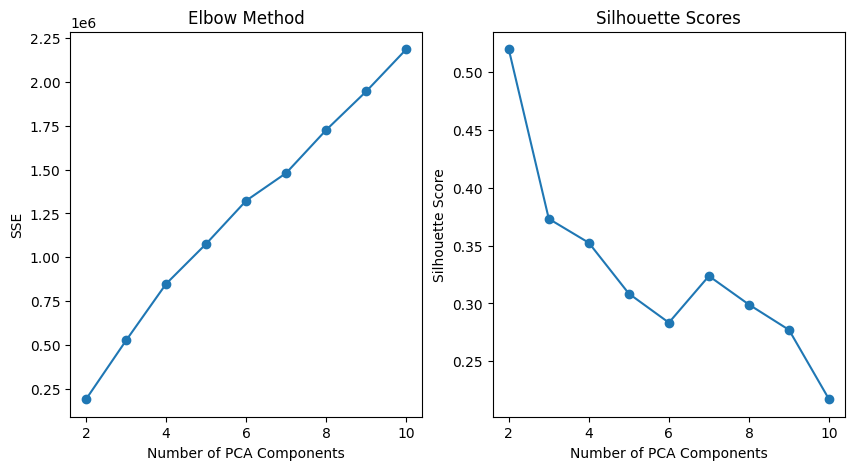

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from joblib import dump



# Æ¯¼º-¶óº§ µ¥ÀÌÅÍ ºÐ¸®
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']

# µ¥ÀÌÅÍ¸¦ Á¤±ÔÈ­
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# ¿©·¯ Å¬·¯½ºÅÍ °³¼ö Å×½ºÆ®
sse = []
silhouette_scores = []
for k in range(2, 11):
    pca = PCA(n_components=k)
    pca_data = pca.fit_transform(scaled_data)
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(pca_data)
    
    dump(kmeans, f'kmeans_comp_{k}.joblib')
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# °á°ú ½Ã°¢È­
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of PCA Components')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.show()

Explained Variance Ratio by PCA: [0.13880381 0.10087273 0.06875798]


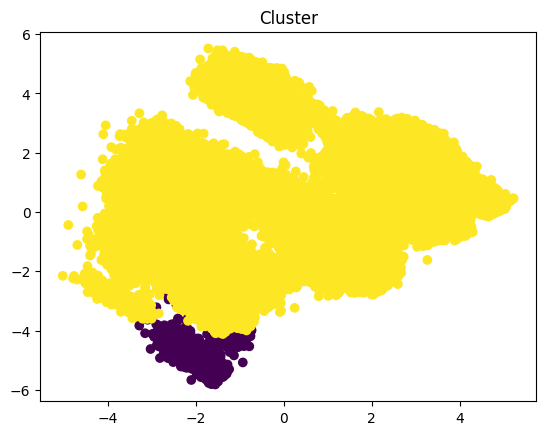

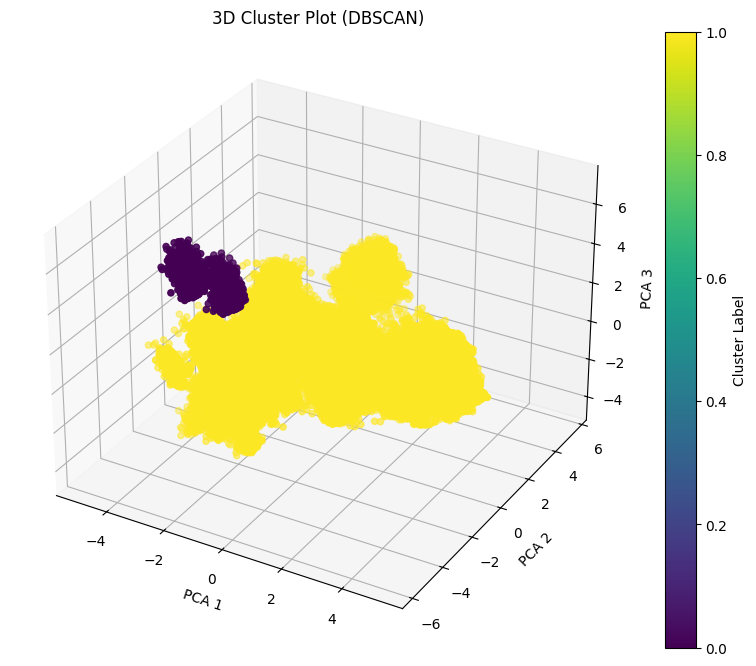

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Æ¯¼º-¶óº§ µ¥ÀÌÅÍ ºÐ¸®
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']

# µ¥ÀÌÅÍ¸¦ Á¤±ÔÈ­
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA¸¦ »ç¿ëÇÏ¿© µ¥ÀÌÅÍÀÇ Â÷¿øÀ» Ãà¼Ò
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]
df['pca3'] = pca_data[:, 2]
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# Evaluate DBSCAN as an alternative clustering algorithm
dbscan = DBSCAN(eps=2, min_samples=15) # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(pca_data)
df['cluster'] = dbscan_labels

# cluster(kmeans ±ºÁý µ¥ÀÌÅÍ) ±âÁØ ½Ã°¢È­
plt.scatter(x=df['pca1'], y=df['pca2'], c=df['cluster'])
plt.title('Cluster')
plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster'], cmap='viridis')
ax.set_title('3D Cluster Plot (DBSCAN)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [11]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


eps_values = np.arange(0.2, 1.0, 0.1)     # eps °ª ¹üÀ§ ¼³Á¤
min_samples_values = [5, 10, 15,20]       # min_samples °ª ¹üÀ§ ¼³Á¤

results = []

for eps in eps_values:
    for min_samp in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(pca_data)

        # Å¬·¯½ºÅÍ°¡ ÃÖ¼Ò 2°³ ÀÌ»óÀÎÁö È®ÀÎ (³ëÀÌÁî Á¦¿Ü)
        unique_labels = set(labels) - {-1}  # ³ëÀÌÁî Å¬·¯½ºÅÍ(-1) Á¦¿Ü
        if len(unique_labels) > 1:
            filtered_data_pca = pca_data[labels != -1]  # ³ëÀÌÁî Á¦°ÅµÈ µ¥ÀÌÅÍ
            filtered_labels = labels[labels != -1]     # ³ëÀÌÁî Á¦°ÅµÈ ·¹ÀÌºí

            # ½Ç·ç¿§ ½ºÄÚ¾î °è»ê
            silhouette_avg = silhouette_score(filtered_data_pca, filtered_labels)

            # Davies-Bouldin Index °è»ê (³·À»¼ö·Ï ÁÁÀ½)
            dbi = davies_bouldin_score(filtered_data_pca, filtered_labels)

            # Calinski-Harabasz Index °è»ê (³ôÀ»¼ö·Ï ÁÁÀ½)
            ch = calinski_harabasz_score(filtered_data_pca, filtered_labels)

            # °á°ú ÀúÀå
            results.append((eps, min_samp, silhouette_avg, dbi, ch))
        else:
            pass
            # print(f"Skipping eps={eps}, min_samples={min_samp} due to insufficient clusters.")

# °á°ú¸¦ Á¤·Ä
sorted_sil = sorted(results, key=lambda x: x[2], reverse=True)
sorted_DBI = sorted(results, key=lambda x: x[3], reverse=True)
sorted_CH = sorted(results, key=lambda x: x[4], reverse=True)

# ÃÖÀû ÆÄ¶ó¹ÌÅÍ Ãâ·Â
print("??Top results based on Silhouette Score:")
for res in sorted_sil[:5]:  # »óÀ§ 5°³ °á°ú Ãâ·Â
    print(f"eps={res[0]:.2f}, min_samples={res[1]}, Silhouette Score={res[2]:.4f}, DBI={res[3]:.4f}, CH={res[4]:.4f}")
print("\n??Top results based on DBI Score:")
for res in sorted_DBI[:5]:  # »óÀ§ 5°³ °á°ú Ãâ·Â
    print(f"eps={res[0]:.2f}, min_samples={res[1]}, Silhouette Score={res[2]:.4f}, DBI={res[3]:.4f}, CH={res[4]:.4f}")
print("\n??Top results based on CH Score:")
for res in sorted_CH[:5]:  # »óÀ§ 5°³ °á°ú Ãâ·Â
    print(f"eps={res[0]:.2f}, min_samples={res[1]}, Silhouette Score={res[2]:.4f}, DBI={res[3]:.4f}, CH={res[4]:.4f}")

??Top results based on Silhouette Score:
eps=0.20, min_samples=20, Silhouette Score=0.8052, DBI=0.3201, CH=15652.4927
eps=0.20, min_samples=15, Silhouette Score=0.5586, DBI=0.5996, CH=10478.9071
eps=0.20, min_samples=10, Silhouette Score=0.4127, DBI=0.7635, CH=4961.0377
eps=0.20, min_samples=5, Silhouette Score=0.4072, DBI=0.6562, CH=2666.8739
eps=0.80, min_samples=20, Silhouette Score=0.3989, DBI=0.9979, CH=30034.1690

??Top results based on DBI Score:
eps=0.50, min_samples=15, Silhouette Score=-0.0455, DBI=1.1099, CH=6273.2394
eps=0.40, min_samples=15, Silhouette Score=-0.0648, DBI=1.1023, CH=3557.9587
eps=0.50, min_samples=20, Silhouette Score=0.0779, DBI=1.0964, CH=8637.9769
eps=0.40, min_samples=10, Silhouette Score=-0.1599, DBI=1.0668, CH=2118.5608
eps=0.50, min_samples=10, Silhouette Score=-0.1468, DBI=1.0606, CH=3475.5275

??Top results based on CH Score:
eps=0.80, min_samples=20, Silhouette Score=0.3989, DBI=0.9979, CH=30034.1690
eps=0.90, min_samples=20, Silhouette Score=0.39

In [ ]:
# ÇÊ¿äÇÑ ¶óÀÌºê·¯¸® import (´©¶ô ¹æÁö)
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from joblib import dump
from sklearn.metrics import classification_report


# Å¬·¯½ºÅÍº° ¸ðµ¨ ÀúÀå µñ¼Å³Ê¸®
cluster_models = {}

data = df
display(data.keys())


# °¢ Å¬·¯½ºÅÍº°·Î ¹Ýº¹ ¼öÇà
for cluster_id in data['cluster'].unique():
    print(f"\n Training model for Cluster {cluster_id}...")
    
    # Å¬·¯½ºÅÍº° µ¥ÀÌÅÍ ºÐ¸®
    cluster_data = data[data['cluster'] == cluster_id]
   
    # ÀÔ·Â µ¥ÀÌÅÍ(X)¿Í Å¸°Ù º¯¼ö(y) ¼³Á¤
    X = data.drop('final_result', axis=1)
    y = data['final_result']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #### ¿©±â¿¡ ¸ðµ¨ ÈÆ·Ã ½ÃÅ°¸é µÊ ####
    xgb_clf =  XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor',
                             n_estimators=500, max_depth=8, learning_rate=np.float64(0.4))

    X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, random_state=0)

    eval_set = [(X_tr, y_tr), (X_val, y_val)]
    xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)

    y_pred = xgb_clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

    dump(xgb_clf, f'dbscan_xgb_clf_{cluster_id}.joblib')

print("\n?? Training complete for all clusters!")

Index(['Unnamed: 0', 'gender', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'date_registration', 'module_presentation_length', 'my_average_score',
       'my_score_std', 'my_score_trend', 'assessment_weight', 'weighted_score',
       'course_avg_score', 'course_max_score', 'course_std_score',
       'course_late_rate', 'days_early_submission', 'my_late_rate',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J',
       'assessment_type_CMA', 'assessment_type_Exam', 'assessment_type_TMA'],
      dtype='object')